In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [4]:
class_names = ['Arive-Dantu',
               'Basale',
               'Curry']

In [5]:
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

In [6]:
IMAGE_SIZE = (400, 400)

In [7]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

In [8]:
def load_data():
    datasets = ['/content/drive/My Drive/ColabNotebooks/practice']
    output = []

    # Iterate through the dataset
    for dataset in datasets:
        images = []
        labels = []

        print(f"Loading {dataset}")

        # Iterate through each folder representing a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(dataset, folder, file)
                image = pre_process(img_path)
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        output.append((images, labels))

    # If there's only one dataset, split it into training and testing
    if len(output) == 1:
        images, labels = output[0]

          # Split the dataset randomly
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
        output.append((train_images, train_labels, test_images, test_labels))

        return output


In [9]:
train_images, train_labels, test_images, test_labels = load_data()[1]

Loading /content/drive/My Drive/ColabNotebooks/practice


100%|██████████| 500/500 [00:13<00:00, 36.22it/s]


In [10]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [11]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1200
Number of testing examples: 300
Each image is of size: (400, 400)


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [14]:
def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

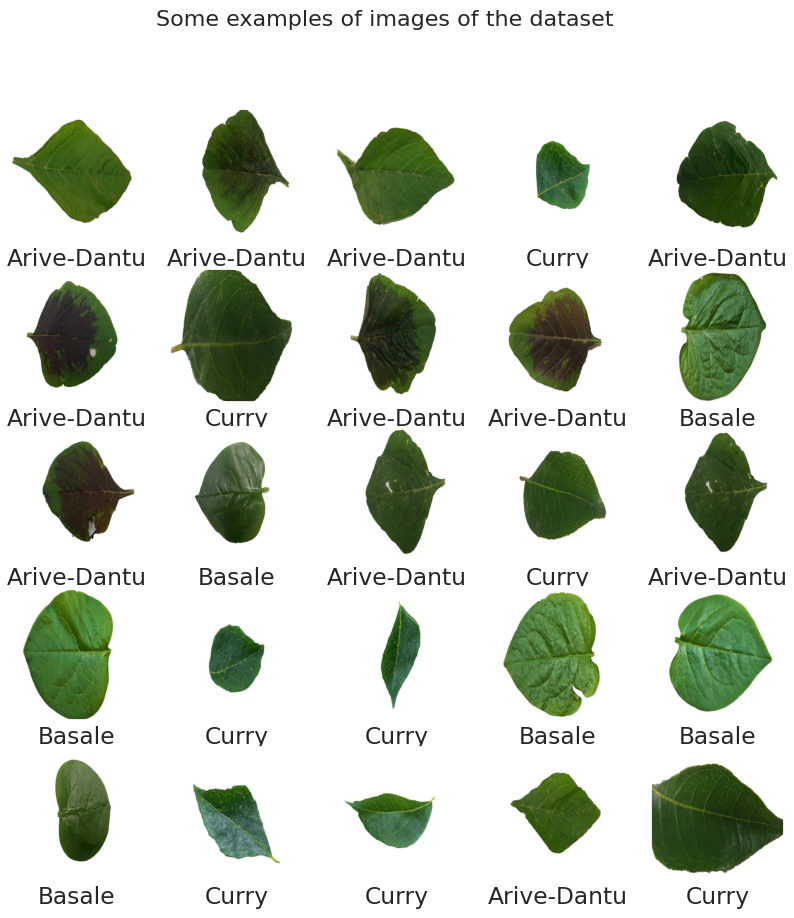

In [15]:
display_examples(class_names, train_images, train_labels)